In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# 1. Import the "Retail_Sales_Data.csv" dataset
data = pd.read_csv('Supermart Grocery Sales - Retail Analytics Dataset.csv')
data

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20,Tamil Nadu
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,89.60,Tamil Nadu
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.26,918.45,Tamil Nadu
...,...,...,...,...,...,...,...,...,...,...,...
9989,OD9990,Sudeep,"Eggs, Meat & Fish",Eggs,Madurai,12/24/2015,West,945,0.16,359.10,Tamil Nadu
9990,OD9991,Alan,Bakery,Biscuits,Kanyakumari,07-12-2015,West,1195,0.26,71.70,Tamil Nadu
9991,OD9992,Ravi,Food Grains,Rice,Bodi,06-06-2017,West,1567,0.16,501.44,Tamil Nadu
9992,OD9993,Peer,Oil & Masala,Spices,Pudukottai,10/16/2018,West,1659,0.15,597.24,Tamil Nadu


In [9]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9994 non-null   object 
 1   Customer Name  9994 non-null   object 
 2   Category       9994 non-null   object 
 3   Sub Category   9994 non-null   object 
 4   City           9994 non-null   object 
 5   Order Date     9994 non-null   object 
 6   Region         9994 non-null   object 
 7   Sales          9994 non-null   int64  
 8   Discount       9994 non-null   float64
 9   Profit         9994 non-null   float64
 10  State          9994 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 859.0+ KB
None


In [10]:
print(data.describe())

             Sales     Discount       Profit
count  9994.000000  9994.000000  9994.000000
mean   1496.596158     0.226817   374.937082
std     577.559036     0.074636   239.932881
min     500.000000     0.100000    25.250000
25%    1000.000000     0.160000   180.022500
50%    1498.000000     0.230000   320.780000
75%    1994.750000     0.290000   525.627500
max    2500.000000     0.350000  1120.950000


In [11]:
# 3. Identify the relevant variables for aggregating sales data
# Assuming the relevant columns are 'Region', 'Sales_Amount', 'Product_Category'
relevant_columns = ['Region', 'Sales', 'Category']
data = data[relevant_columns]

In [12]:
# 4. Group the sales data by region and calculate the total sales amount for each region
sales_by_region = data.groupby('Region')['Sales'].sum().reset_index()
sales_by_region = sales_by_region.sort_values(by='Sales', ascending=False)

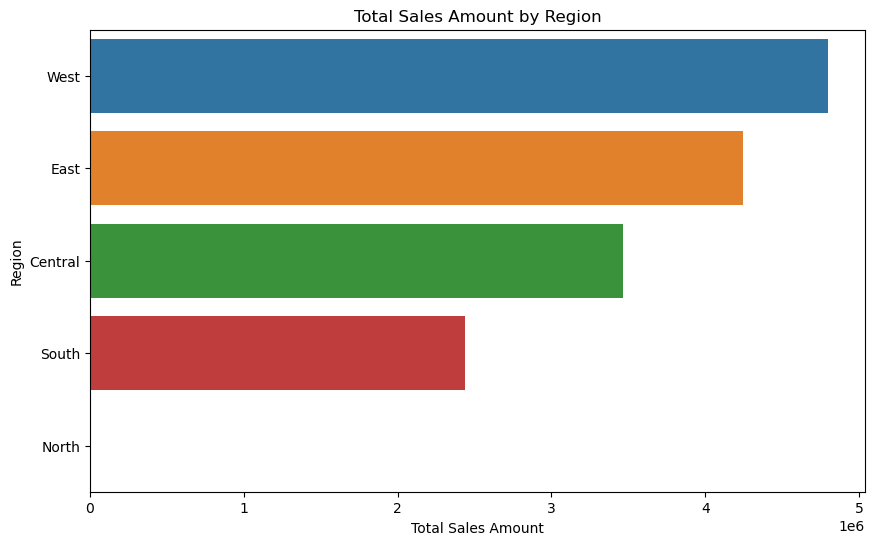

In [13]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Sales', y='Region', data=sales_by_region)
plt.title('Total Sales Amount by Region')
plt.xlabel('Total Sales Amount')
plt.ylabel('Region')
plt.show()

In [14]:
# 6. Identify the top-performing regions based on the highest sales amount
top_regions = sales_by_region.head(5)
print("Top Performing Regions:\n", top_regions)

Top Performing Regions:
     Region    Sales
4     West  4798743
1     East  4248368
0  Central  3468156
3    South  2440461
2    North     1254


In [15]:
# 7. Group the sales data by region and product category to calculate the total sales amount for each combination
sales_by_region_category = data.groupby(['Region', 'Category'])['Sales'].sum().unstack().fillna(0)

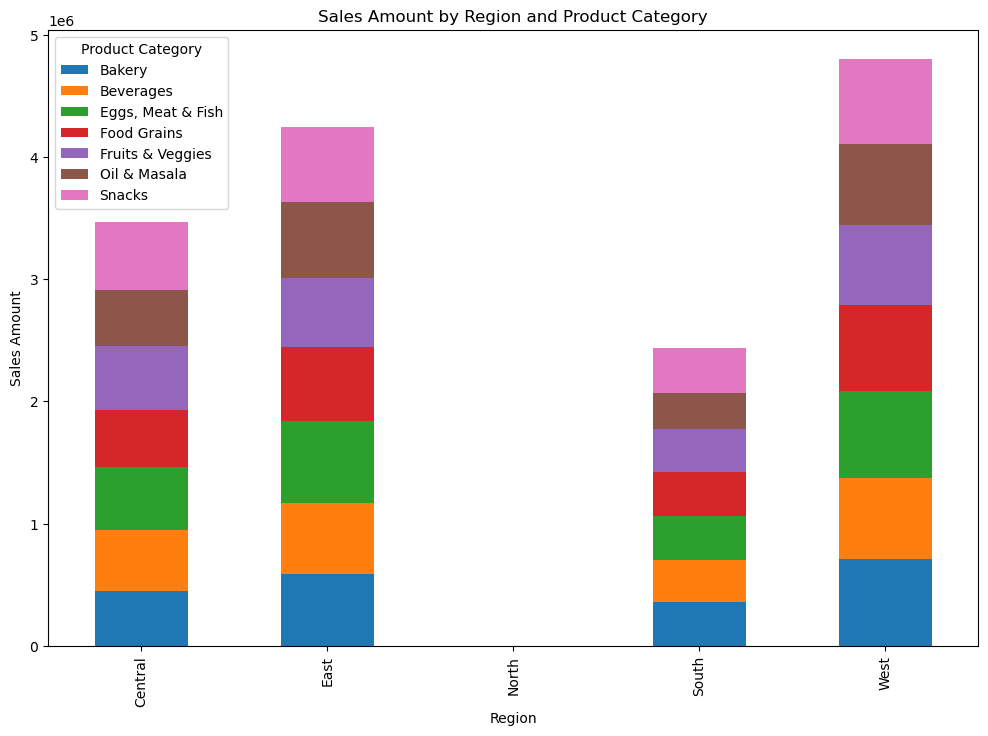

In [17]:
# 8. Create stacked bar plots or grouped bar plots to compare the sales amounts across different regions and product categories
sales_by_region_category.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Sales Amount by Region and Product Category')
plt.xlabel('Region')
plt.ylabel('Sales Amount')
plt.legend(title='Product Category')
plt.show()

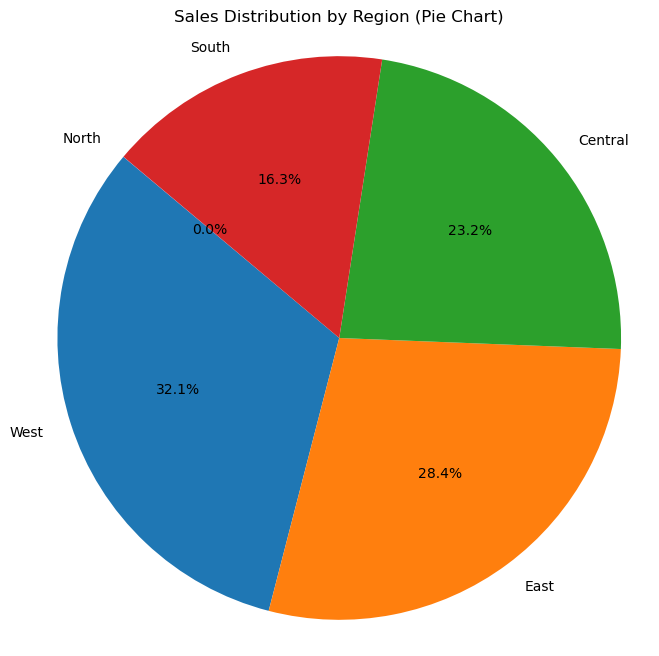

In [18]:
# Create a pie chart to visualize the sales distribution by region
plt.figure(figsize=(8, 8))
plt.pie(sales_by_region['Sales'], labels=sales_by_region['Region'], autopct='%1.1f%%', startangle=140)
plt.title('Sales Distribution by Region (Pie Chart)')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()